In [29]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [30]:
df = pd.read_csv('TikTok_songs_2022.csv')
df.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


Meta Data
- Title: TikTok popular songs 2022
- Source: TikTok popular songs 2022 | Kaggle
- Size: 127 kB
- Shape: 18 columns, 1070 rows
- Information:
    + Track_name
    + Artist_name
    + Artist_pop
    + Album
    + Track_pop
    + Danceability
    + Energy
    + Loudness
    + Mode
    + Key
    + Speechiness
    + Acousticness 
    + Instrumentalness
    + Liveness
    + Valence
    + Tempo
    + Time_signature
    + Duration_ms

In [31]:
df.shape

(1070, 18)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        1070 non-null   object 
 1   artist_name       1070 non-null   object 
 2   artist_pop        1070 non-null   int64  
 3   album             1070 non-null   object 
 4   track_pop         1070 non-null   int64  
 5   danceability      1070 non-null   float64
 6   energy            1070 non-null   float64
 7   loudness          1070 non-null   float64
 8   mode              1070 non-null   int64  
 9   key               1070 non-null   int64  
 10  speechiness       1070 non-null   float64
 11  acousticness      1070 non-null   float64
 12  instrumentalness  1070 non-null   float64
 13  liveness          1070 non-null   float64
 14  valence           1070 non-null   float64
 15  tempo             1070 non-null   float64
 16  time_signature    1070 non-null   int64  


Preprocessing Data

In [35]:
# Handle duplicated values
df[df.duplicated()]

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
263,Say So,Doja Cat,88,Hot Pink,80,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893
264,Blinding Lights,The Weeknd,93,After Hours,90,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040
266,Savage,Megan Thee Stallion,82,Suga,70,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497
276,Break My Heart,Dua Lipa,88,Future Nostalgia,78,0.730,0.729,-3.434,0,4,0.0884,0.16700,0.000001,0.3490,0.467,113.011,4,221820
279,The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.01150,0.006780,0.1670,0.785,116.879,4,216320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,Say So,Doja Cat,88,Hot Pink,80,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893
1027,We R Who We R,Kesha,76,Cannibal (Expanded Edition),72,0.736,0.817,-4.900,1,8,0.0407,0.00987,0.001670,0.1170,0.653,119.950,4,204760
1030,Y U Gotta B Like That,Audrey Mika,56,Y U Gotta B Like That,58,0.732,0.413,-6.353,1,9,0.0702,0.28700,0.000000,0.0565,0.761,92.066,4,154456
1033,Airplane Mode,Limbo,50,Holo,0,0.665,0.373,-10.631,1,7,0.1580,0.85200,0.118000,0.1080,0.070,119.905,4,164113


In [ ]:
df = df.drop_duplicates()
df.shape

(719, 18)

In [ ]:
# Handle missing values
df.isnull().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [ ]:
df.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,63.447844,56.980529,0.724912,0.635660,-6.860733,0.577191,5.321280,0.140251,0.220324,0.027657,0.187917,0.541764,121.684346,3.958275,183104.781641
std,18.111147,24.042260,0.136562,0.163875,2.670111,0.494350,3.654429,0.135667,0.243066,0.120502,0.142066,0.220856,26.120042,0.300298,50472.616595
min,0.000000,0.000000,0.174000,0.045800,-23.928000,0.000000,0.000000,0.025200,0.000038,0.000000,0.019400,0.036300,62.619000,1.000000,37632.000000
25%,51.000000,48.000000,0.650000,0.520000,-8.166500,0.000000,2.000000,0.044650,0.028850,0.000000,0.093350,0.383000,101.995500,4.000000,151629.500000
50%,65.000000,63.000000,0.736000,0.652000,-6.400000,1.000000,5.000000,0.082800,0.123000,0.000001,0.124000,0.537000,121.796000,4.000000,177856.000000
75%,78.000000,74.000000,0.822000,0.762000,-4.992500,1.000000,8.000000,0.204500,0.327500,0.000209,0.257500,0.720000,134.959500,4.000000,212317.000000
max,95.000000,97.000000,0.980000,0.983000,-2.180000,1.000000,11.000000,0.907000,0.984000,0.939000,0.944000,0.978000,210.857000,5.000000,467587.000000


In [ ]:
df_label = df[['track_name', 'artist_name', 'album']]
df_label = df_label.apply(LabelEncoder().fit_transform)

df = df.drop(columns=['track_name', 'artist_name', 'album'])
df = pd.concat([df, df_label], axis=1)
df

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_name,artist_name,album
0,81,95,0.629,0.547,-13.123,0,10,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,298933,477,214,234
1,91,96,0.520,0.731,-5.338,0,6,0.0557,0.34200,0.001010,0.3110,0.662,173.930,4,167303,31,173,34
2,73,44,0.768,0.716,-5.110,1,10,0.0404,0.35000,0.000000,0.1500,0.841,131.430,4,163026,526,318,507
3,80,89,0.761,0.525,-6.900,1,11,0.0944,0.44000,0.000007,0.0921,0.531,80.870,4,238805,225,161,143
4,81,92,0.836,0.743,-6.305,0,10,0.0656,0.09950,0.000000,0.3350,0.722,108.966,4,191822,10,255,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,32,50,0.845,0.518,-7.568,1,11,0.2990,0.07030,0.000000,0.1220,0.443,129.951,4,135993,506,35,486
1066,77,78,0.742,0.883,-3.419,1,0,0.0329,0.33300,0.000008,0.0964,0.978,136.506,4,240280,348,275,88
1067,51,63,0.715,0.738,-10.139,1,7,0.1570,0.00826,0.000000,0.2600,0.573,97.877,4,252307,252,398,250
1068,11,26,0.649,0.735,-4.365,0,10,0.7300,0.14600,0.000000,0.1240,0.845,86.704,5,134769,397,72,374


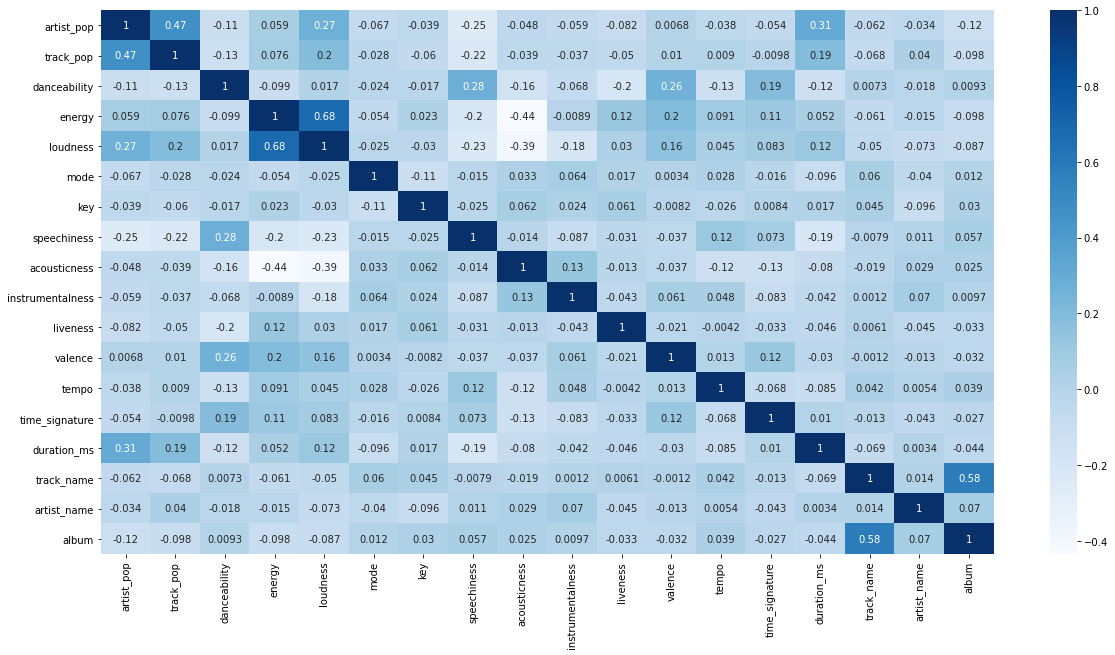

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Blues)
plt.show()

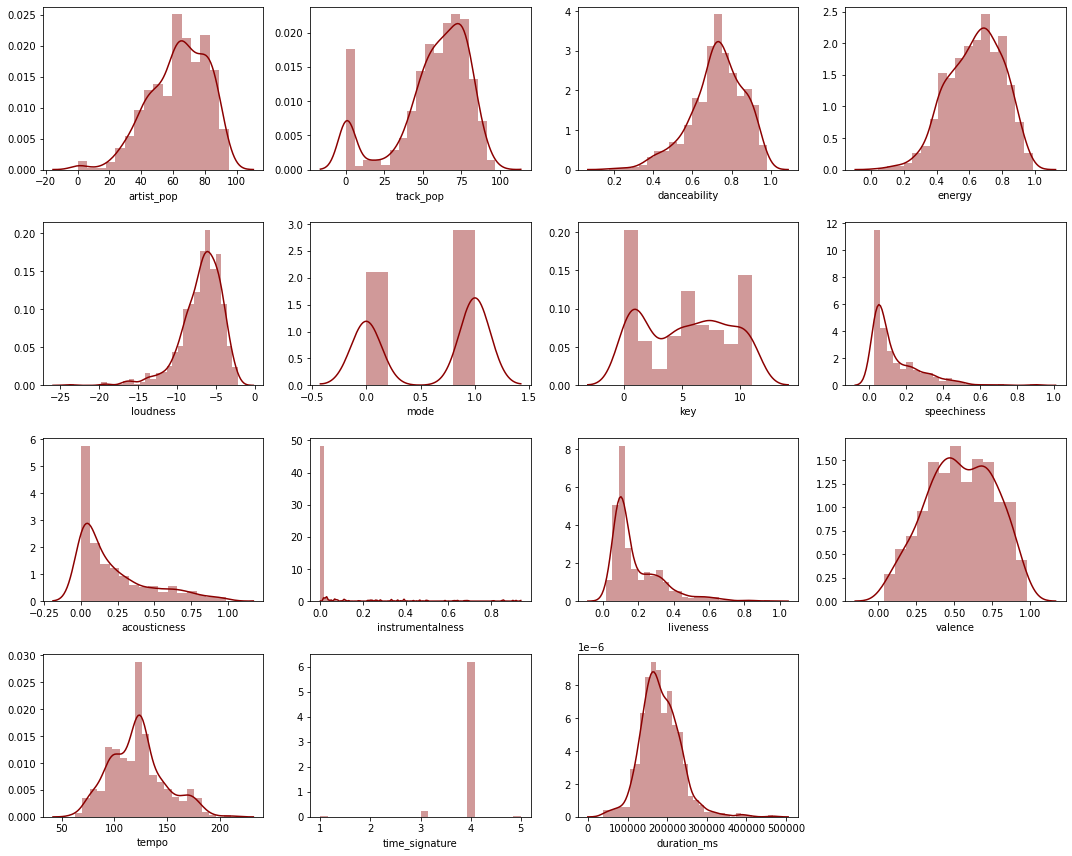

In [ ]:
plt.figure(figsize=(15,12))

columns = ['artist_pop', 'track_pop', 'danceability',
       'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 
       'valence', 'tempo', 'time_signature', 'duration_ms']
for ind, col in enumerate(columns):
    plt.subplot(4,4, ind+1)
    sns.distplot(df[col], color='darkred')
plt.tight_layout()
plt.show()

In [ ]:
# detective outlier
def zscore_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

def iqr_outliers(seri):
    outliers = []
    Q1, Q3= np.percentile(seri,[25,75])
    IQR = Q3 - Q1 
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    for ele in seri: 
        if ele>upper_fence or ele<lower_fence:
            outliers.append(ele)
    return outliers

In [ ]:
# # count outliers
# cnt = 0
# out_track_pop = ['artist_pop', 'track_pop', 'danceability',
#        'energy', 'loudness', 'mode', 'key', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 
#        'valence', 'tempo', 'time_signature', 'duration_ms']
# print('---- Number of outlier in each column ----')
# for i in df.columns['artist_pop', 'track_pop', 'danceability',
#        'energy', 'loudness', 'mode', 'key', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 
#        'valence', 'tempo', 'time_signature', 'duration_ms']:
#     li =  iqr_outliers(df[i])
#     cnt += len(li)
#     if i == 'track_pop':
#         out_track_pop = li
#     print(f'{i}: {len(li)}')
# print('Total outlier of dataset:', cnt)

In [ ]:
outstanding = [] 
for i in df['track_pop']: 
    if i > 70:
        i = 1
        outstanding.append(i)
    else:
        i = 0
        outstanding.append(i)
df['outstanding'] = outstanding
df['outstanding'].value_counts()

0    472
1    247
Name: outstanding, dtype: int64

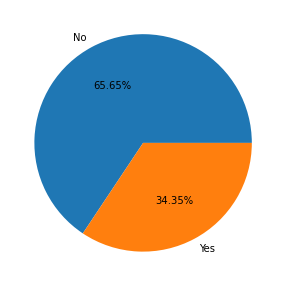

In [ ]:
# plot distribution
fig= plt.figure(figsize=(6,5))

value=(df['outstanding'].value_counts())/len(df['outstanding'])
labels= ['No', 'Yes']
plt.pie(value, labels = labels, autopct='%.2f%%')

plt.show()

In [ ]:
x = df.drop(columns={'outstanding', 'track_pop'},axis=1)
y = df['outstanding']

In [ ]:
mms = MinMaxScaler()
mms.fit(x)
scaled_x = mms.transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2,random_state=365)

print('Train size:', len(y_train))
print(y_train.value_counts())
print('-----------------------')
print('Test size', len(y_test))
print(y_test.value_counts())

Train size: 575
0    378
1    197
Name: outstanding, dtype: int64
-----------------------
Test size 144
0    94
1    50
Name: outstanding, dtype: int64


Accuracy = 0.7013888888888888
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        94
           1       0.59      0.44      0.51        50

    accuracy                           0.70       144
   macro avg       0.67      0.64      0.65       144
weighted avg       0.69      0.70      0.69       144



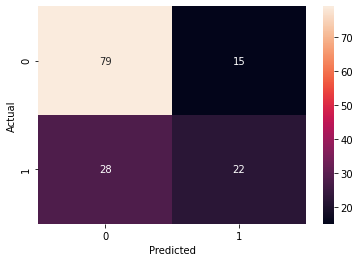

In [ ]:
# model
reg = LogisticRegression() 
reg.fit(X_train,y_train) 
y_pred = reg.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# cassification report
print(classification_report(y_test,y_pred))

# confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

# MODEL SELECTION

Logistic Regression

Accuracy = 0.7083333333333334
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        87
           1       0.70      0.46      0.55        57

    accuracy                           0.71       144
   macro avg       0.71      0.66      0.67       144
weighted avg       0.71      0.71      0.69       144



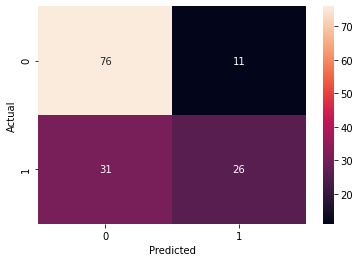

In [ ]:
# Assigning X and y
x = df.drop(columns={'outstanding', 'track_pop'},axis=1)
y = df['outstanding']

# Scaling features
mms = MinMaxScaler()
mms.fit(x)
scaled_x = mms.transform(x)

# Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2,random_state=69)

# Model
reg = LogisticRegression() 
reg.fit(X_train,y_train) 
y_pred = reg.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# Cassification report
print(classification_report(y_test,y_pred))

# Confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

K Nearest Neighbors

In [ ]:
# Assigning X and y
x = df.drop(columns={'outstanding', 'track_pop'},axis=1)
y = df['outstanding']

# Scaling features
mms = MinMaxScaler()
mms.fit(x)
scaled_x = mms.transform(x)

# Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2,random_state=365)

- Train model with k=5

Accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        94
           1       0.56      0.48      0.52        50

    accuracy                           0.69       144
   macro avg       0.65      0.64      0.64       144
weighted avg       0.68      0.69      0.68       144



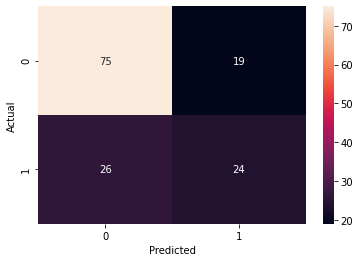

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,p=2,weights='distance')
knn.fit(X_train,y_train.values.ravel())
y_predict3 = knn.predict(X_test)

# Accuracy
acc3 = accuracy_score(y_test,y_predict3)
print(f'Accuracy: {acc3}')

# Cassification report
print(classification_report(y_test,y_predict3))

# Confustion matrix
cm3 = confusion_matrix(y_test, y_predict3)
ax = sns.heatmap(cm3, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

- Train model with k=7

Accuracy: 0.6597222222222222
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        94
           1       0.51      0.40      0.45        50

    accuracy                           0.66       144
   macro avg       0.61      0.60      0.60       144
weighted avg       0.64      0.66      0.65       144



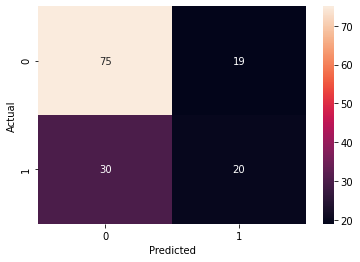

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7,p=2,weights='distance')
knn.fit(X_train,y_train.values.ravel())
y_predict7 = knn.predict(X_test)

# Accuracy
acc7 = accuracy_score(y_test,y_predict7)
print(f'Accuracy: {acc7}')

# Cassification report
print(classification_report(y_test,y_predict7))

# Confustion matrix
cm7 = confusion_matrix(y_test, y_predict7)
ax = sns.heatmap(cm7, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

Naive Bayes

Accuracy = 0.7152777777777778
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        94
           1       0.58      0.64      0.61        50

    accuracy                           0.72       144
   macro avg       0.69      0.70      0.69       144
weighted avg       0.72      0.72      0.72       144



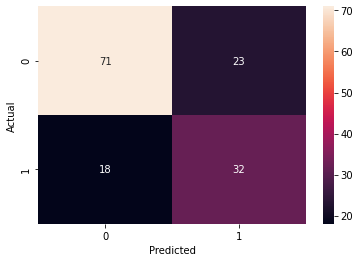

In [ ]:
# Assigning X and y
x = df.drop(columns={'outstanding', 'track_pop'},axis=1)
y = df['outstanding']

# Scaling features
mms = MinMaxScaler()
mms.fit(x)
scaled_x = mms.transform(x)

# Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2,random_state=365)

# Model
gnb = GaussianNB()
gnb.fit(X_train,y_train) 
y_pred = gnb.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# Cassification report
print(classification_report(y_test,y_pred))

# Confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

Perceptron

Accuracy = 0.7013888888888888
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        94
           1       0.55      0.74      0.63        50

    accuracy                           0.70       144
   macro avg       0.69      0.71      0.69       144
weighted avg       0.73      0.70      0.71       144



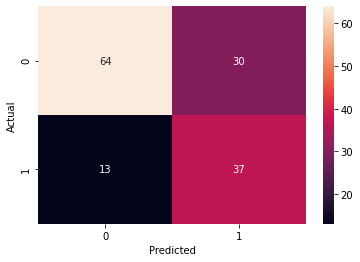

In [ ]:
# Assigning X and y
x = df.drop(columns={'outstanding', 'track_pop'},axis=1)
y = df['outstanding']

# Scaling features
mms = MinMaxScaler()
mms.fit(x)
scaled_x = mms.transform(x)

# Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2,random_state=365)

# Model
per = Perceptron() 
per.fit(X_train,y_train) 
y_pred = per.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# Cassification report
print(classification_report(y_test,y_pred))

# Confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

In [ ]:
import pandas as pd

records = [('Logistic Regresstion', 0.71, 0.87, 0.78), 
           ('K Nearnest Neighbor', 0.69, 0.80, 0.77),
           ('Naive Bayes', 0.72, 0.76, 0.78),
           ('Perceptron', 0.70, 0.68, 0.75)]

# Khởi tạo DataFrame
df = pd.DataFrame(data = records, columns = ['Model', 'accuracy', 'recall', 'f1_score'])
df

,Model,accuracy,recall,f1_score
0,Logistic Regresstion,0.71,0.87,0.78
1,K Nearnest Neighbor,0.69,0.80,0.77
2,Naive Bayes,0.72,0.76,0.78
3,Perceptron,0.70,0.68,0.75


In [ ]:
col = list(df['accuracy']) + list(df['recall']) + list(df['f1_score'])
stats = ['accuracy','accuracy','accuracy','accuracy', 'recall', 'recall','recall','recall', 'f1_score', 'f1_score','f1_score','f1_score']
df_2 = pd.DataFrame()
df_2['score']= list(col)
df_2['algorithm'] = list(df['Model'])*3
df_2['stats'] = stats
df_2

,score,algorithm,stats
0,0.71,Logistic Regresstion,accuracy
1,0.69,K Nearnest Neighbor,accuracy
2,0.72,Naive Bayes,accuracy
3,0.70,Perceptron,accuracy
4,0.87,Logistic Regresstion,recall
5,0.80,K Nearnest Neighbor,recall
6,0.76,Naive Bayes,recall
7,0.68,Perceptron,recall
8,0.78,Logistic Regresstion,f1_score
9,0.77,K Nearnest Neighbor,f1_score


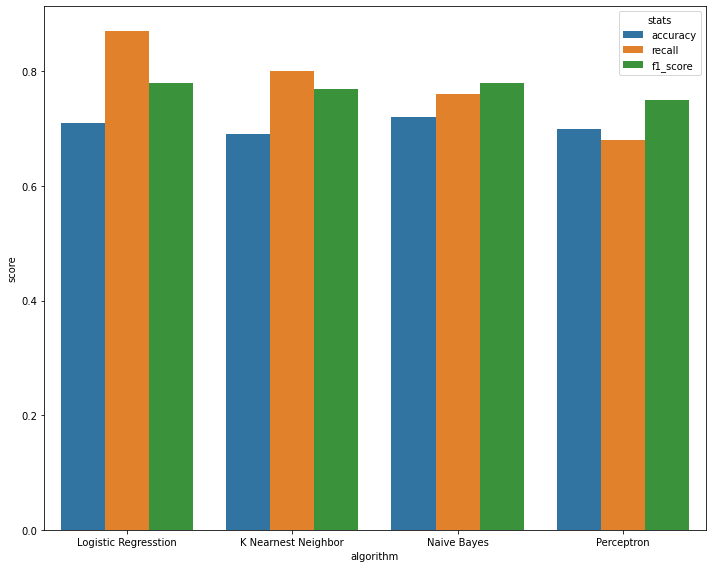

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.barplot(data=df_2 , x='algorithm', y='score', hue="stats")
plt.tight_layout()